In [3]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
np.random.seed(0)

(array([  3.,  35.,  84., 170., 261., 222., 136.,  68.,  17.,   4.]),
 array([ 6.99911849,  7.62823533,  8.25735217,  8.88646902,  9.51558586,
        10.1447027 , 10.77381955, 11.40293639, 12.03205323, 12.66117008,
        13.29028692]),
 <BarContainer object of 10 artists>)

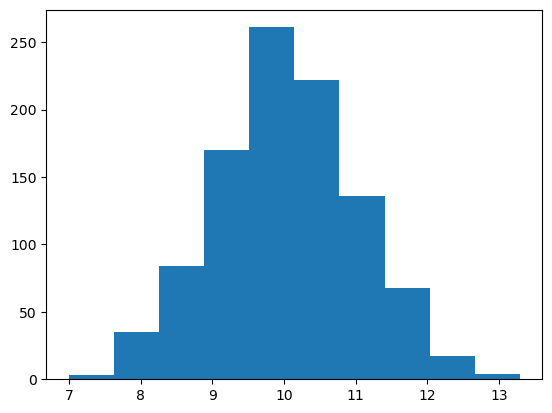

In [5]:
# Check that your notebook and matplotlib are working.
x = np.random.normal(10, size=1000)
plt.hist(x)